In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DP.csv to DP.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['DP.csv']))

In [ ]:
df1.shape

(720, 18)

In [ ]:
df1.head

<bound method NDFrame.head of            Hs        Ht        Hd        Hr         Cv  FF          FD  \
0    0.003533  0.002459  0.003876  0.002048   0.092059  13  124.567093   
1    0.003767  0.002130  0.002346  0.002048   0.072275  10  104.678932   
2    0.003800  0.003092  0.002047  0.003876   0.087331  15  128.983674   
3    0.004000  0.002459  0.002459  0.002346   0.092059  13  124.567093   
4    0.004400  0.002130  0.002130  0.002047   0.036578  10  104.678932   
..        ...       ...       ...       ...        ...  ..         ...   
715  0.007459  0.005699  0.100508  0.054198   7.234890  32  946.901175   
716  0.007469  0.005559  0.100922  0.054402  10.008408  23  948.760375   
717  0.007479  0.005419  0.101337  0.054606   6.098670  28  950.619574   
718  0.007489  0.005280  0.101751  0.054810   7.134570  21  952.478774   
719  0.007499  0.005140  0.102165  0.055014   7.348760  27  954.337974   

             SD         SA       FSR   RT       C_E       P_E       TCE  \
0     

In [ ]:
df1.isnull().sum()

Hs          0
Ht          0
Hd          0
Hr          0
Cv          0
FF          0
FD          0
SD          0
SA          0
FSR         0
RT          0
C_E         0
P_E         0
TCE         0
Workload    0
Time        0
tc          0
fn          0
dtype: int64

In [ ]:
X= df1[['Hs','Ht','Hd','Hr','Cv','FF','FD','SD','SA','FSR','RT','C_E','P_E','TCE','tc','fn']]
y = df1['Workload']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)



0.9798639466964212

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
math.sqrt(mean_squared_error(y_test, y_pred))


0.12049244158477695

In [ ]:
r2_score(y_test, y_pred)


0.9798639466964212

In [ ]:
prediction_linear=regressor.predict(X_test)

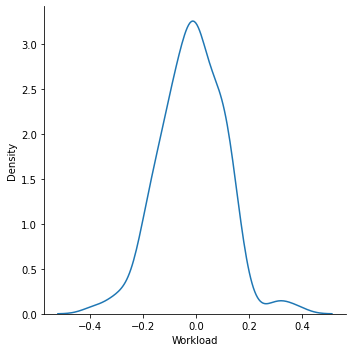

In [ ]:
sns.displot(prediction_linear-y_test, kind='kde')

#Ridge regression


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1,10,20,30,50,100,200,300,400,500,600,700,800,900,1000]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 20, 30, 50, 100, 200, 300, 400, 500,
                                   600, 700, 800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1}
-0.035101844123225166


In [ ]:
prediction_ridge=ridge_regressor.predict(X_test)

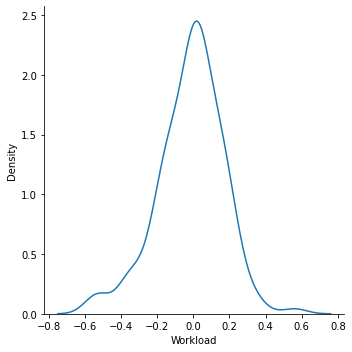

In [ ]:
sns.displot(prediction_ridge-y_test, kind='kde')

#Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)




In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1,10,20,30,50,100,200,300,400,500,600,700,800,900,1000]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 10, 20, 30, 50, 100, 200, 300, 400, 500,
                                   600, 700, 800, 900, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 1}
-0.12510503910527543


In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)

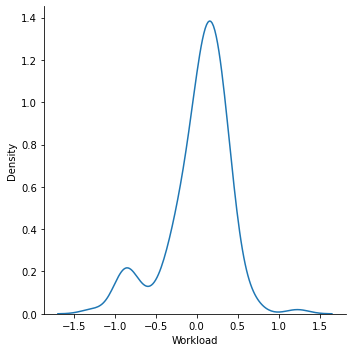

In [ ]:
sns.displot(prediction_lasso-y_test, kind='kde')